## Content : scripts to get pannels with 10y-return levels and return periods (Fig 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.legend import Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import xarray as xr
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
import matplotlib

### Stations

In [2]:
all_stations=["Cayenne-Matoury","Maripasoula","Saint-Georges","Saint-Laurent"
              ,"Raizet","Saint-Barthelemy","Lamentin","Gillot","Pamandzi","Tromelin",
             "Koumac","Tontouta","Noumea","Ouanaham","Hihifo","Maopoopo"
              ,"Faaa","Hiva-oa","Mangareva","Rapa","Takaroa"
             ]

### PLOT

/tmp/ipykernel_60415/4240869950.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(np.arange(2000,2101,20),rotation=45,ha='right',fontsize=20)
/tmp/ipykernel_60415/4240869950.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(np.arange(30,90,10),fontsize=20)
/tmp/ipykernel_60415/4240869950.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels([1,2,5,10],fontsize=20)
/tmp/ipykernel_60415/4240869950.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(np.arange(2000,2101,20),rotation=45,ha='right',fontsize=20)
/tmp/ipykernel_60415/4240869950.py:89: UserWarning: se

/tmp/ipykernel_60415/4240869950.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(np.arange(2000,2101,20),rotation=45,ha='right',fontsize=20)
/tmp/ipykernel_60415/4240869950.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(np.arange(30,90,10),fontsize=20)
/tmp/ipykernel_60415/4240869950.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels([1,2,5,10],fontsize=20)
/tmp/ipykernel_60415/4240869950.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(np.arange(2000,2101,20),rotation=45,ha='right',fontsize=20)
/tmp/ipykernel_60415/4240869950.py:89: UserWarning: se

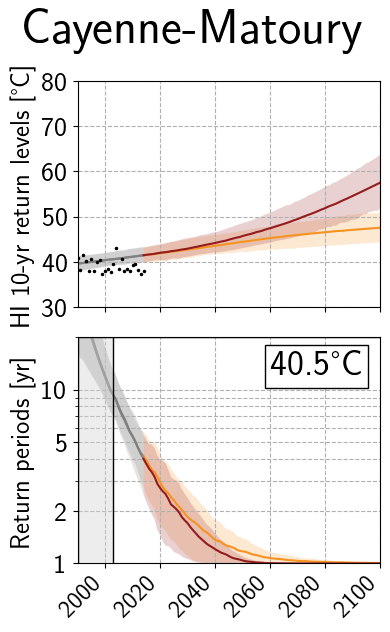

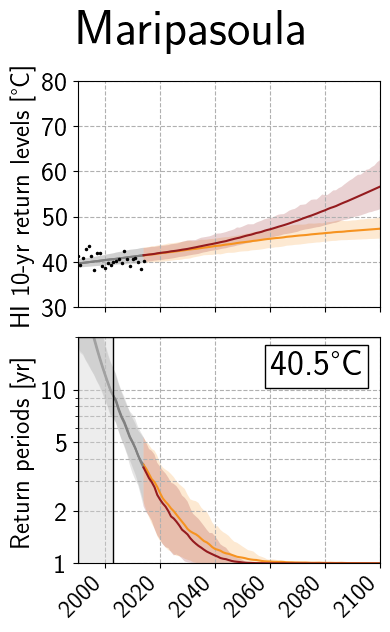

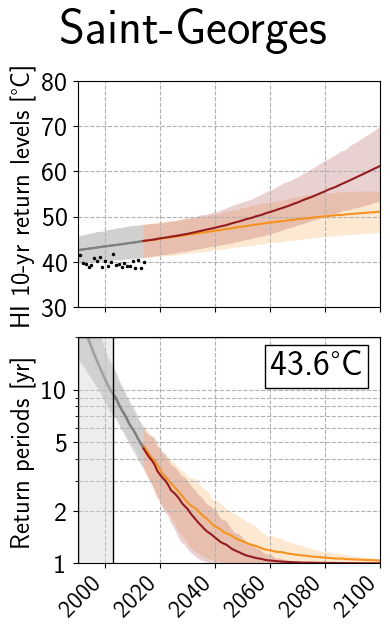

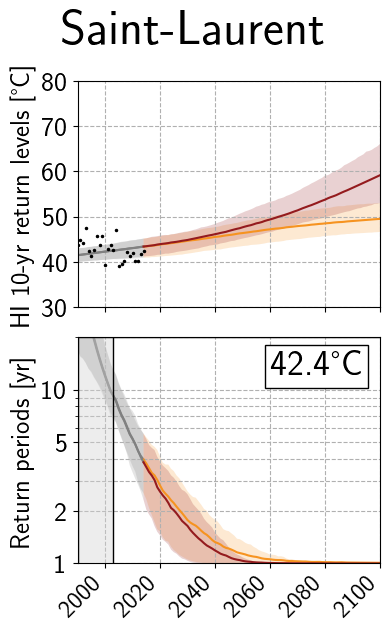

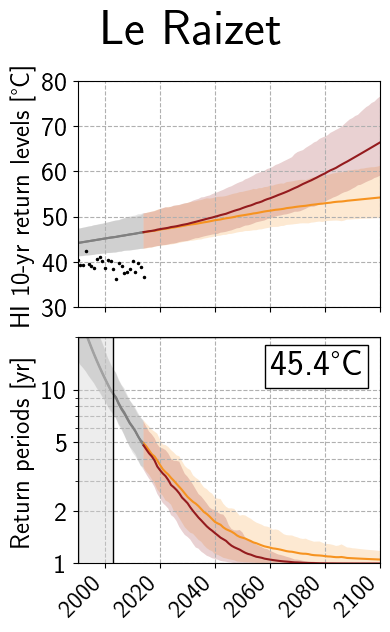

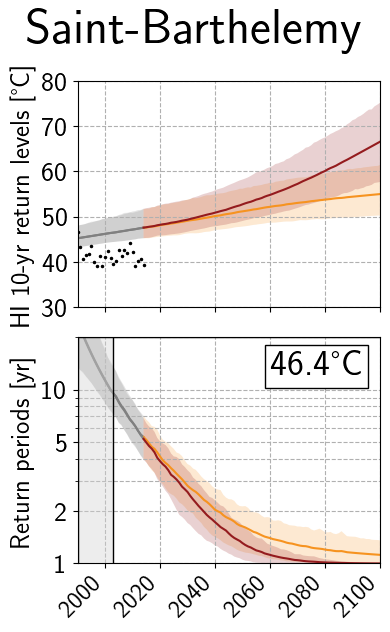

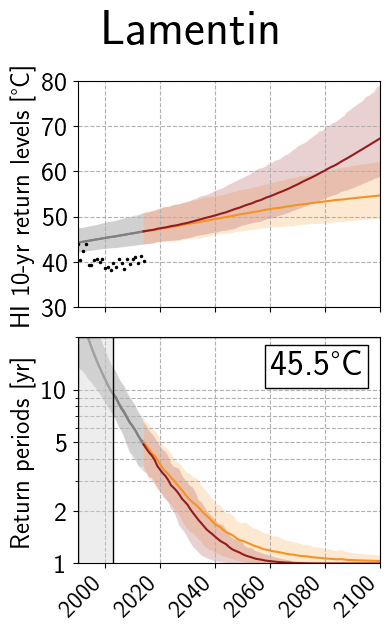

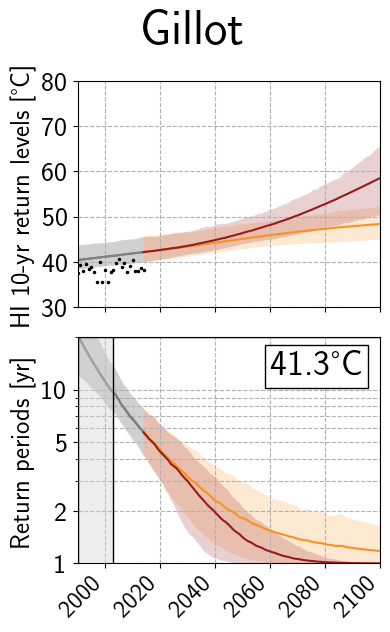

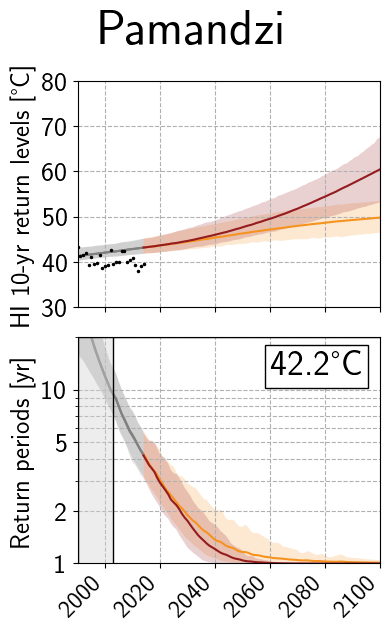

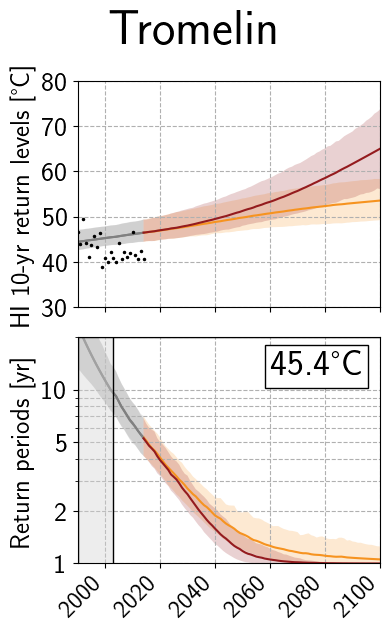

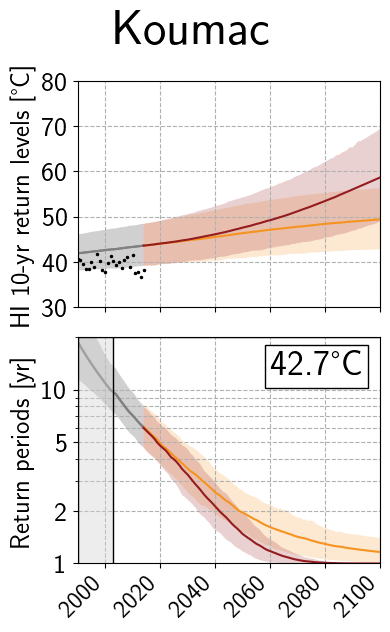

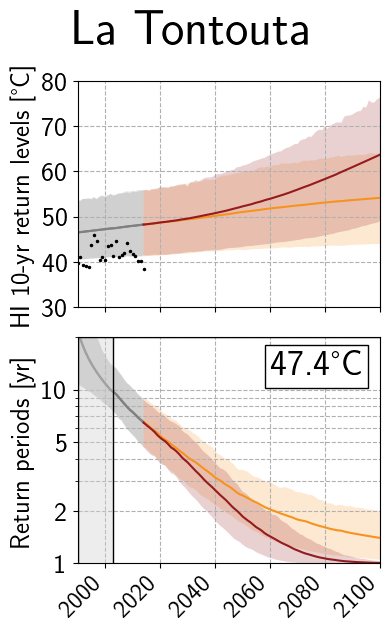

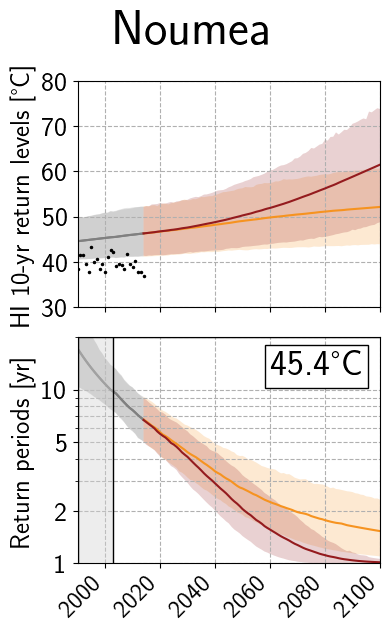

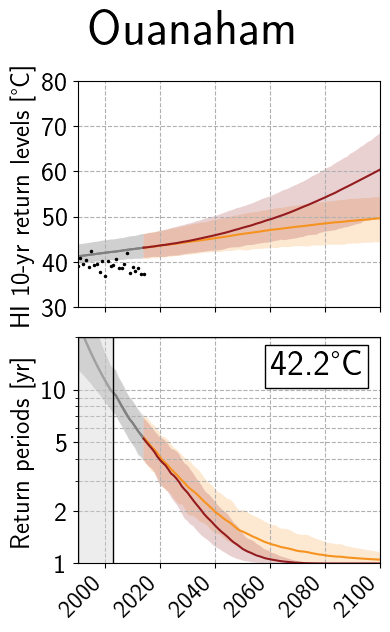

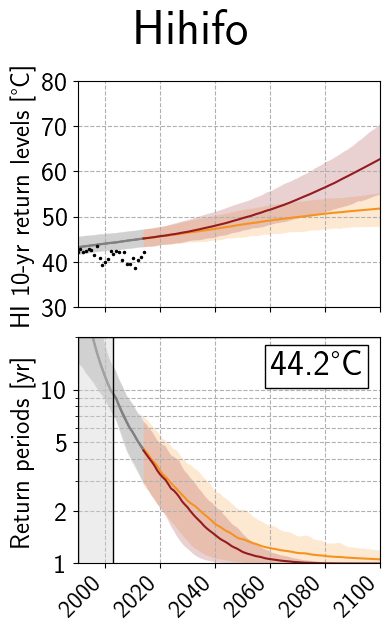

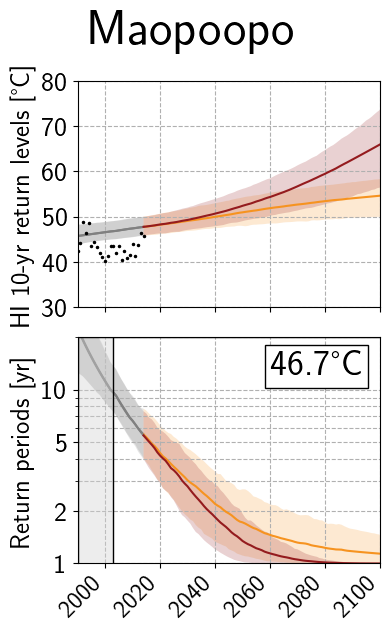

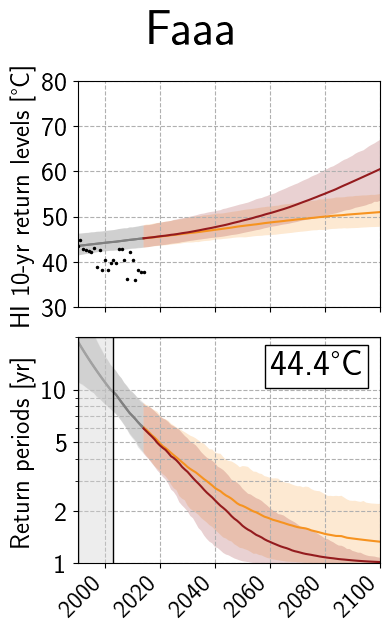

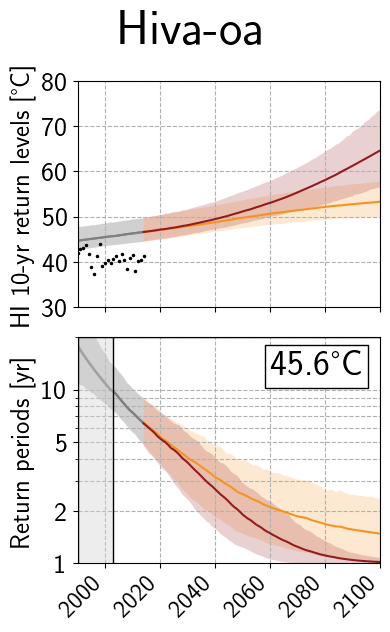

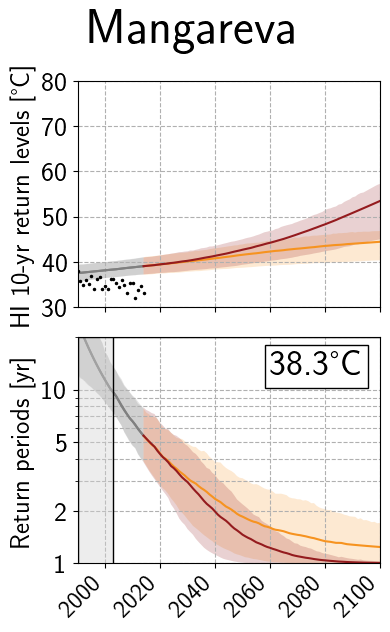

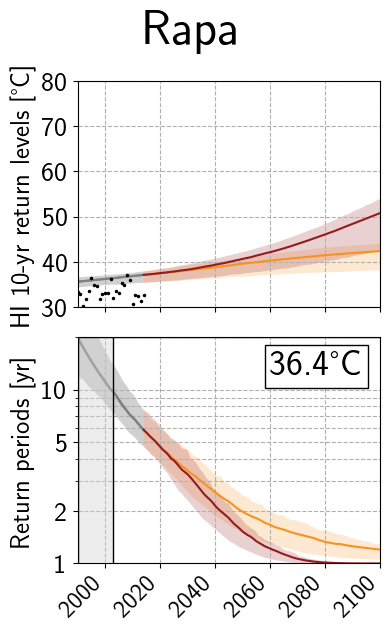

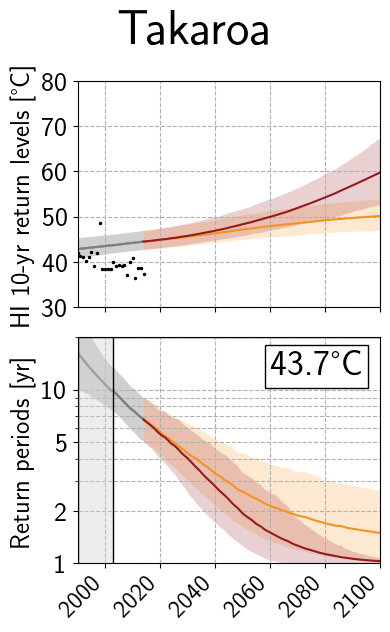

In [5]:

#the return period of the event we study
return_period_input_list=[10]

#parameter to write in LateX
rc('text', usetex=True)


for return_period_input in return_period_input_list:
    for station in all_stations:
        
    
        fig, axs = plt.subplots(ncols=1,nrows=2,
                        sharex=True,
                        layout='tight',
                        figsize=(4,6.4))
        
            
        # Observation data management
        
        dirobs="/OBS/"
        data_obs=pd.read_csv(dirobs+station+"_obs_1985-2014_HIX.csv")
        data_obs['time']=pd.to_datetime(data_obs['time'])
        max_obs=data_obs['HI'].groupby(data_obs.time.dt.year).max()
        
        # Modeles
        
        dirin="./CMIP6/GEV/"
                    
        RL_q10_ssp245=np.nanquantile(np.load(dirin+'/'+str(return_period_input)+'y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy'),0.1,axis=0)#quantiles
        RL_q90_ssp245=np.nanquantile(np.load(dirin+'/'+str(return_period_input)+'y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy'),0.9,axis=0)
        RL_mean_ssp245=xr.open_dataset(dirin+'/'+str(return_period_input)+'y-RL_HI_1990-2100_ssp245_'+station+'.nc')#mean
    
            
        RL_q10_ssp585=np.nanquantile(np.load(dirin+'/'+str(return_period_input)+'y-RL_HI_1990-2100_ssp585_'+station+'_all_samples.npy'),0.1,axis=0)#quantiles
        RL_q90_ssp585=np.nanquantile(np.load(dirin+'/'+str(return_period_input)+'y-RL_HI_1990-2100_ssp585_'+station+'_all_samples.npy'),0.9,axis=0)
        RL_mean_ssp585=xr.open_dataset(dirin+'/'+str(return_period_input)+'y-RL_HI_1990-2100_ssp585_'+station+'.nc')#mean
        
        
        RP_q10_ssp245=np.nanquantile(np.load(dirin+'/'+str(return_period_input)+'y-RP_HI_1990-2100_ssp245_'+station+'_all_samples.npy'),0.1,axis=0)#quantiles
        RP_q90_ssp245=np.nanquantile(np.load(dirin+'/'+str(return_period_input)+'y-RP_HI_1990-2100_ssp245_'+station+'_all_samples.npy'),0.9,axis=0)
        RP_mean_ssp245=xr.open_dataset(dirin+'/'+str(return_period_input)+'y-RP_HI_1990-2100_ssp245_'+station+'.nc')#mean
    
            
        RP_q10_ssp585=np.nanquantile(np.load(dirin+'/'+str(return_period_input)+'y-RP_HI_1990-2100_ssp585_'+station+'_all_samples.npy'),0.1,axis=0)#quantiles
        RP_q90_ssp585=np.nanquantile(np.load(dirin+'/'+str(return_period_input)+'y-RP_HI_1990-2100_ssp585_'+station+'_all_samples.npy'),0.9,axis=0)
        RP_mean_ssp585=xr.open_dataset(dirin+'/'+str(return_period_input)+'y-RP_HI_1990-2100_ssp585_'+station+'.nc')#mean
    
        ### PLOT
        
        # TOP PANEL
    
        #SSP2-4.5
        
        line1=axs[0].plot(RL_mean_ssp245.year.values[:25],RL_mean_ssp245.RL.values[:25],color='grey',label='Historical')
        axs[0].fill_between(RL_mean_ssp245.year.values[:25],RL_q10_ssp245[:25],y2=RL_q90_ssp245[:25],alpha=0.2,fc='grey')
        
        line2=axs[0].plot(RL_mean_ssp245.year.values[24:],RL_mean_ssp245.RL.values[24:],color=(247/256,148/256,32/256),label='SSP2-4.5')
        axs[0].fill_between(RL_mean_ssp245.year.values[24:],RL_q10_ssp245[24:],y2=RL_q90_ssp245[24:],alpha=0.2,fc=(247/256,148/256,32/256))

        #SSP5-8.5
        
        axs[0].plot(RL_mean_ssp585.year.values[:25],RL_mean_ssp585.RL.values[:25],color='grey')
        axs[0].fill_between(RL_mean_ssp585.year.values[:25],RL_q10_ssp585[:25],y2=RL_q90_ssp585[:25],alpha=0.2,fc='grey')
        
        line3=axs[0].plot(RL_mean_ssp585.year.values[24:],RL_mean_ssp585.RL.values[24:],color=(149/256,27/256,30/256),label='SSP5-8.5')
        axs[0].fill_between(RL_mean_ssp585.year.values[24:],RL_q10_ssp585[24:],y2=RL_q90_ssp585[24:],alpha=0.2,fc=(149/256,27/256,30/256))
        
        line4=axs[0].plot(RL_mean_ssp585.year.values[:25], max_obs.values[5:], color='k',ls='',marker='o',label='Max obs',markersize=1.5)
        
        
        #other parameters
        axs[0].set_xticklabels(np.arange(2000,2101,20),rotation=45,ha='right',fontsize=20)
        axs[0].set_xticks(np.arange(2000,2101,20))
        axs[0].set_xlim([1990,2100])
        
        axs[0].set_ylim([30,80])
        axs[0].set_yticklabels(np.arange(30,90,10),fontsize=20)
        axs[0].set_yticks(np.arange(30,90,10))
        
        axs[0].grid(ls='--',visible=True)


        axs[0].set_ylabel('HI 10-yr return levels [°C]',fontsize=19)
        
        
        
        # BOTTOM PANEL
        
        #SSP2-4.5
        
        axs[1].plot(RP_mean_ssp245.year.values[:25],RP_mean_ssp245.RP.values[:25],color='grey')
        axs[1].fill_between(RP_mean_ssp245.year.values[:25],RP_q10_ssp245[:25],y2=RP_q90_ssp245[:25],alpha=0.2,fc='grey')
        
        axs[1].plot(RP_mean_ssp245.year.values[24:],RP_mean_ssp245.RP.values[24:],color=(247/256,148/256,32/256),label='SSP2-4.5')
        axs[1].fill_between(RP_mean_ssp245.year.values[24:],RP_q10_ssp245[24:],y2=RP_q90_ssp245[24:],alpha=0.2,fc=(247/256,148/256,32/256))

        #SSP5-8.5
        
        axs[1].plot(RP_mean_ssp585.year.values[:25],RP_mean_ssp585.RP.values[:25],color='grey')
        axs[1].fill_between(RP_mean_ssp585.year.values[:25],RP_q10_ssp585[:25],y2=RP_q90_ssp585[:25],alpha=0.2,fc='grey')
        
        axs[1].plot(RP_mean_ssp585.year.values[24:],RP_mean_ssp585.RP.values[24:],color=(149/256,27/256,30/256),label='SSP5-8.5')
        axs[1].fill_between(RP_mean_ssp585.year.values[24:],RP_q10_ssp585[24:],y2=RP_q90_ssp585[24:],alpha=0.2,fc=(149/256,27/256,30/256))
        
        
        #other parameters
        axs[1].set_xlim([1990,2100])
        axs[1].set_xticklabels(np.arange(2000,2101,20),rotation=45,
                               ha='right',
                               fontsize=18)
        axs[1].set_xticks(np.arange(2000,2101,20))
        axs[1].set_ylim([1,20])
        axs[1].set_yscale('log')
        axs[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        axs[1].set_yticklabels([1,2,5,10],fontsize=20)
        axs[1].set_yticks([1,2,5,10])
        
        axs[1].grid(ls='--',which="both",visible=True)
        
        axs[1].set_ylabel('Return periods [yr]',fontsize=19)
        
        axs[1].text(2060,12,'{}°C'.format(np.round(np.nanmean(RL_mean_ssp245.RL.values[:25]),1)),bbox=dict(facecolor='white'),fontsize=26)
        
        axs[1].fill_between(x=np.arange(1990,2004,1),y1=-10,y2=30,alpha=0.4,fc='lightgrey',zorder=5)

        axs[1].axvline(2003,color='k',linestyle='-',linewidth=1,zorder=6)
        
        axs[1].axvline(1990,color='k',linestyle='-',linewidth=1,zorder=7)
        
        axs[1].axhline(20,color='k',linestyle='-',linewidth=1,zorder=7)
        
        
        #saving
    
        fig.savefig("/figures/fig1/{}y_RL_and_RP_".format(return_period_input)+station+'.png',bbox_inches='tight',transparent=False,dpi=400)
        fig.savefig("/figures/fig1/{}y_RL_and_RP_".format(return_period_input)+station+'.svg',bbox_inches='tight',transparent=False,dpi=400)

    